In [1]:
# ⚙️ Setup inicial en Google Colab

# Si no tienes git instalado o es tu primera vez:
# !apt-get install git

# 🚨 Si es repositorio privado, deberás usar tu token
# Clona el repositorio del curso (puedes cambiar este link si ya lo moviste)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Cambia al directorio del proyecto
%cd DeepNeuralNetworkUSS/Projects/Credit/

# Reinstala dependencias si es necesario
!pip install -r requirements.txt

Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1453, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 1453 (delta 69), reused 197 (delta 47), pack-reused 1201 (from 2)
Receiving objects: 100% (1453/1453), 54.10 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/DeepNeuralNetworkUSS/Projects/Credit


In [2]:
# 🔧 Ajuste de ruta de imports
import os
import sys

# Añadir path absoluto de la carpeta src
src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
# 🧼 Preprocesamiento de los datos
%cd src
!python preprocess.py
%cd ..

/content/DeepNeuralNetworkUSS/Projects/Credit/src
📥 Cargando datos desde ../data/cs-training.csv
🧼 Eliminando valores extremos y codificando missing...
/content/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].replace(0, np.nan, inplace=True)
/content/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6432 - loss: 0.6754 - val_accuracy: 0.7440 - val_loss: 0.5731
Epoch 2/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7442 - loss: 0.5659 - val_accuracy: 0.7403 - val_loss: 0.5559
Epoch 3/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7497 - loss: 0.5493 - val_accuracy: 0.7537 - val_loss: 0.5422
Epoch 4/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7524 - loss: 0.5406 - val_accuracy: 0.7501 - val_loss: 0.5365
Epoch 5/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7566 - loss: 0.5324 - val_accuracy: 0.7639 - val_loss: 0.5302
Epoch 6/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7572 - loss: 0.5309 - val_accuracy: 0.7543 - val_loss: 0.5354
Epoch 7/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7523 - loss: 0.5344 - val_accuracy: 0.7593 - val_loss: 0.5326
Epoch 8/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7618 - loss: 0.5253 - val_accuracy: 0.

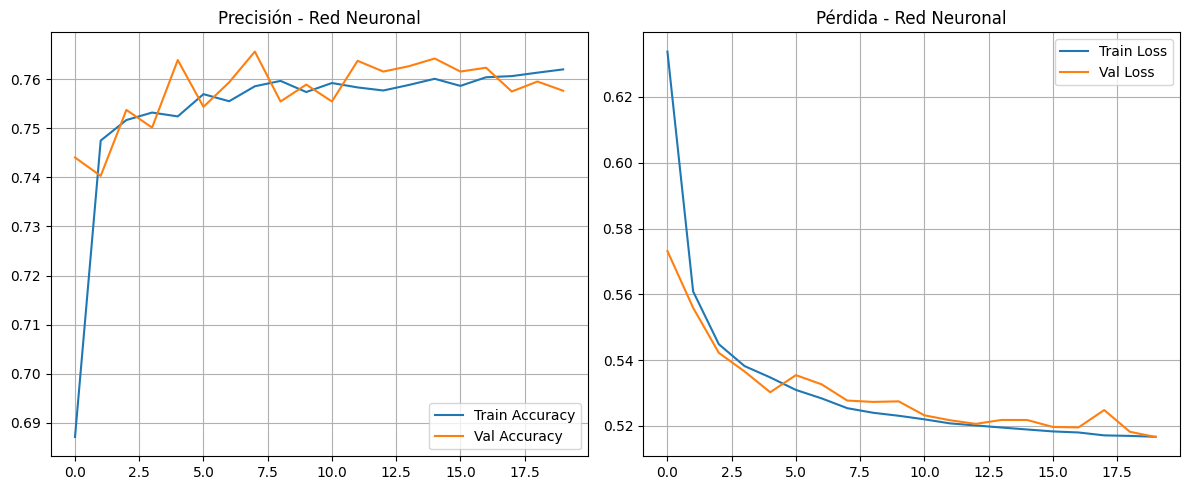

✅ Modelo guardado en models/nn_model.keras


In [4]:
# 🧠 Entrenamiento de la red neuronal

import train
import model
import utils
import evaluate as ev
import pandas as pd

config = train.load_config("config.yaml")
X, y = train.load_data("data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

nn_model = model.build_model(config, X_train.shape[1])
history = train.train_model(nn_model, X_train, y_train, config)

utils.plot_training_history(history, model_name="Red Neuronal")
utils.save_model(nn_model, path="models/nn_model.keras")

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


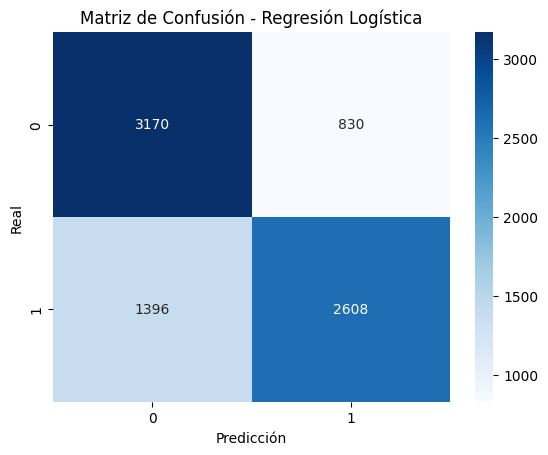

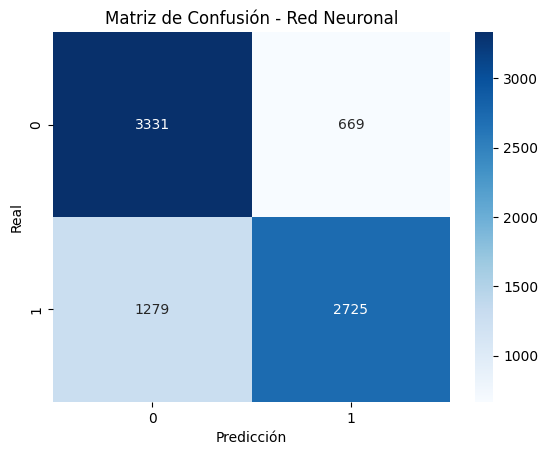

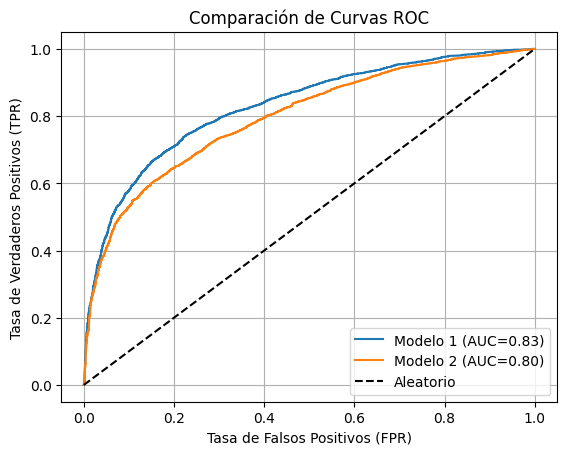

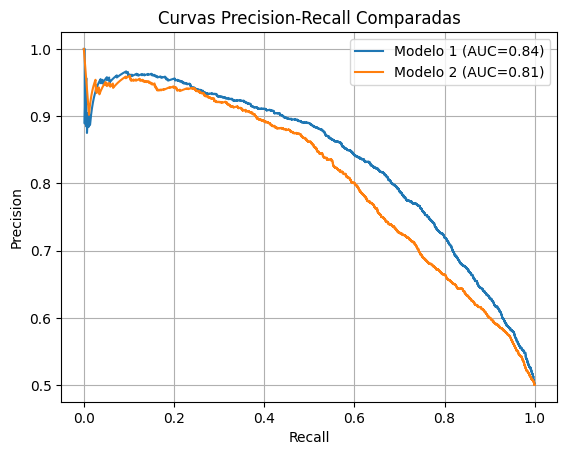

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.802887,0.680569,0.736686,0.829436
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [5]:
# 📈 Evaluación y comparación con Regresión Logística

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Modelo base
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# Red Neuronal
nn_model = load_model("models/nn_model.keras")
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn)

# Evaluación
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log)
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log)

metrics_table = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal", model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(metrics_table)

In [6]:
## ✅ Preguntas de reflexión final

### 🔧 Sobre el modelo de red neuronal:
#- ¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?
#- ¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?
#- ¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?

### 📊 Sobre la evaluación del modelo:
#- ¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?
#- ¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?
#- ¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?

### 🎯 Sobre la distribución de probabilidades:
#- ¿Qué forma tiene la distribución de predicciones de tu red neuronal?
#- ¿En qué umbral se maximiza el F1-score?
#- ¿Crees que usar un threshold de 0.5 es razonable en este caso?

## ✍️ Recomendación

#Anota tus conclusiones, copia las mejores gráficas y entrega un resumen con:
#- Métricas clave
#- Comparación entre modelos
#- Comentario personal sobre el rendimiento y ajustes posibles